<a href="https://colab.research.google.com/github/yousefMohamed2002/Level-2-Tasks---Codveda-Technology--ML-intern/blob/main/Task_3_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Encoded values: [146 134 146 146 135 146 146 146 134 135]
Mapping: {'acceptance': np.int64(0), 'accomplishment': np.int64(1), 'admiration': np.int64(2), 'adoration': np.int64(3), 'adrenaline': np.int64(4), 'adventure': np.int64(5), 'affection': np.int64(6), 'amazement': np.int64(7), 'ambivalence': np.int64(8), 'amusement': np.int64(9), 'anger': np.int64(10), 'anticipation': np.int64(11), 'anxiety': np.int64(12), 'appreciation': np.int64(13), 'apprehensive': np.int64(14), 'arousal': np.int64(15), 'artisticburst': np.int64(16), 'awe': np.int64(17), 'bad': np.int64(18), 'betrayal': np.int64(19), 'bitter': np.int64(20), 'bitterness': np.int64(21), 'bittersweet': np.int64(22), 'blessed': np.int64(23), 'boredom': np.int64(24), 'breakthrough': np.int64(25), 'calmness': np.int64(26), 'captivation': np.int64(27), 'celebration': np.int64(28), 'celestial wonder': np.int64(29), 'challenge': np.int64(30), 'charm': np.int64(31), 'colorful': np.int64(32), 'compassion': np.int64(33), 'compassionate': 

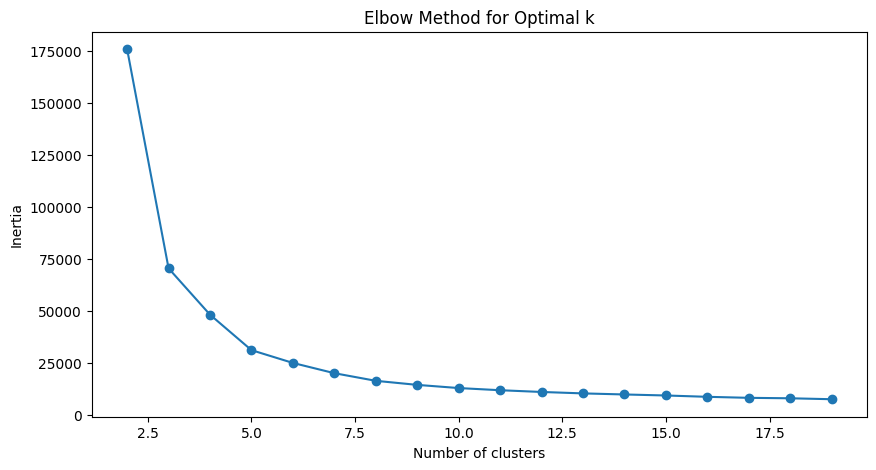

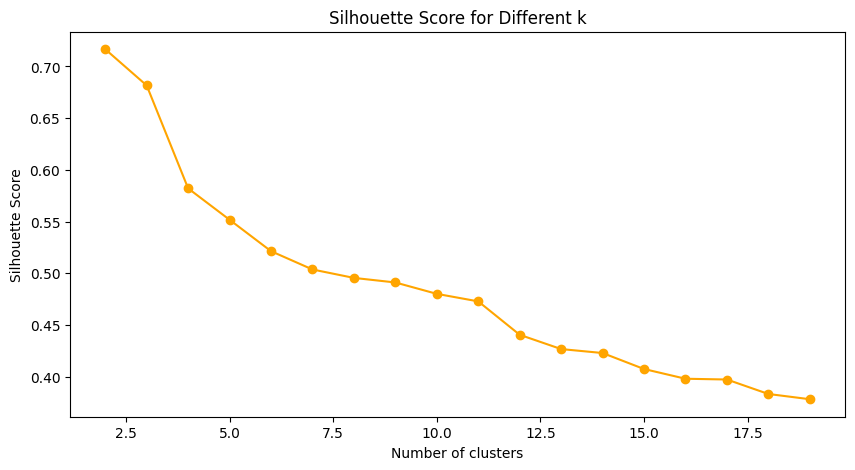

Best k based on silhouette score: 2


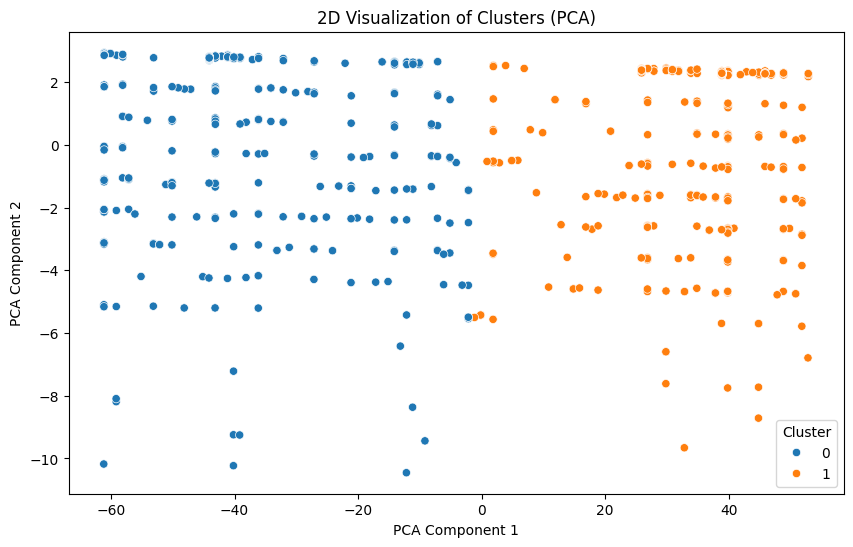


Cluster 0 sample texts:
[' Traffic was terrible this morning.                 '
 ' Trying out a new recipe for dinner tonight.        '
 ' Feeling grateful for the little things in life.    ']

Cluster 1 sample texts:
[' Enjoying a beautiful day at the park!              '
 ' Just finished an amazing workout! 💪               '
 ' Excited about the upcoming weekend getaway!        ']


In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/3) Sentiment dataset.csv')
df['Sentiment'] = df['Sentiment'].str.lower().str.strip()

textVector = TfidfVectorizer(stop_words='english')
text = textVector.fit_transform(df['Text'])

hachtageVector = TfidfVectorizer(stop_words='english')
hacht = hachtageVector.fit_transform(df['Hashtags'])

scaler = StandardScaler()
numeric = scaler.fit_transform(df[['Retweets','Likes']])

le = LabelEncoder()
Year = le.fit_transform(df['Year']).reshape(-1,1)
Month = le.fit_transform(df['Month']).reshape(-1,1)
Day = le.fit_transform(df['Day']).reshape(-1,1)
Hour = le.fit_transform(df['Hour']).reshape(-1,1)
country = le.fit_transform(df['Country']).reshape(-1,1)
y = le.fit_transform(df['Sentiment'])

print("Encoded values:", y[:10])
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

x = hstack([text, hacht, country, Year, numeric])

inertia_values = []
silhouette_values = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(x, labels)
    silhouette_values.append(sil_score)
    print(f"k={k}, Silhouette Score: {sil_score}")

plt.figure(figsize=(10,5))
plt.plot(range(2,20), inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(2,20), silhouette_values, marker='o', color='orange')
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

best_k = range(2,20)[silhouette_values.index(max(silhouette_values))]
print("Best k based on silhouette score:", best_k)


kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(x)
df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
x_2d = pca.fit_transform(x.toarray())

plt.figure(figsize=(10,6))
sns.scatterplot(x=x_2d[:,0], y=x_2d[:,1], hue=df['Cluster'], palette='tab10')
plt.title("2D Visualization of Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()


for cluster in range(best_k):
    print(f"\nCluster {cluster} sample texts:")
    print(df[df['Cluster'] == cluster]['Text'].head(3).values)
